In [1]:
# standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

# local classes
os.chdir('../')
from TraversalDistance.Graph import Graph
from TraversalDistance.FreeSpaceGraph import FreeSpaceGraph
from TraversalDistance.Visualize import Visualize
from TraversalDistance.BinarySearch import BinarySearch
os.chdir('letter_data')

In [2]:
def json_to_graph(json_data):    
    graph = Graph()
    graph.name = json_data['gxl']['graph'][0]['$']['id'][0]
    
    # Extract X, Y coordinates from 'node' elements.
    for node_data in json_data['gxl']['graph'][0]['node']:
        node_id = int(node_data['$']['id'][1:])
        x_coord = float(node_data['attr'][0]['float'][0])
        y_coord = float(node_data['attr'][1]['float'][0])
        graph.addNode(node_id, x_coord, y_coord)

    # Extract edges from 'edge' elements.
    for i, edge_data in enumerate(json_data['gxl']['graph'][0]['edge'], 1):
        from_node = int(edge_data['$']['from'][1:])
        to_node = int(edge_data['$']['to'][1:])
        graph.connectTwoNodes(i, from_node, to_node)
        
    return graph, graph.name

In [3]:
file_names = os.listdir("LOW")
graphs = dict()

for index, file_name in enumerate(file_names):
    if file_name.endswith('.json'):
        try:
            json_graph = json.load(open(f"LOW/{file_name}"))
            graph, name = json_to_graph(json_graph)
            graph.id = index
            if name in graphs.keys():
                graphs[name].append(graph)
            else:
                graphs[name] = [graph]
                
        except Exception as error: 
            print(f"AssertionError {error}: Fail to parse {file_name}.")

AssertionError 'edge': Fail to parse VP1_0125.json.
AssertionError 'edge': Fail to parse LP1_0103.json.
AssertionError 'gxl': Fail to parse test.json.
AssertionError 'edge': Fail to parse LP1_0136.json.
AssertionError 'edge': Fail to parse LP1_0086.json.
AssertionError 'edge': Fail to parse LP1_0068.json.
AssertionError 'edge': Fail to parse VP1_0086.json.
AssertionError 'gxl': Fail to parse validation.json.
AssertionError 'gxl': Fail to parse train.json.
AssertionError 'edge': Fail to parse IP1_0110.json.


In [4]:
for key in graphs.keys():
    count = len(graphs[key])
    print(f"{key}: {count}")

T: 150
A: 150
X: 150
H: 150
Y: 150
I: 149
E: 150
N: 150
L: 146
M: 150
V: 148
Z: 150
F: 150
W: 150
K: 150


In [5]:
# Sample
g1, g2, g3 = graphs['Y'][0], graphs['Y'][1], graphs['Y'][0]
g1.name, g2.name, g3.name = 1, 2, 3
# comparing two identical graphs
binary_search = BinarySearch(g1, g3, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_1 by graph_3 (traversed) minimum epsilon:", epsilon)
print(len(binary_search.cell_boundaries))

# comparing graph two and graph one
binary_search = BinarySearch(g1, g2, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_2 by graph_1 (traversed) minimum epsilon:", epsilon)
print(len(binary_search.cell_boundaries))

# comparing graph one and graph two
binary_search = BinarySearch(g2, g1, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_1 by graph_2 (traversed) minimum epsilon:", epsilon)

Computing graph_1 by graph_3 (traversed) minimum epsilon: 0.673828125
20
Computing graph_2 by graph_1 (traversed) minimum epsilon: 0.625
31
Computing graph_1 by graph_2 (traversed) minimum epsilon: 0.625


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Epsilon: 1'}>)

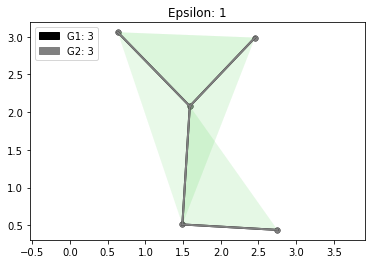

In [6]:
visual = Visualize(g1, g1, epsilon=1)
visual.plot_freespace()